# Basic plot Animation with matplotlib and plotly.

Sometimes it just makes sense to animate a visual.  It can help understand data in a new way and if your medium is the screen you may find yourself needing to animate a visualization.  At that point you may ask which toolkit you should use for your animation.  Here I compare the process for creating a basic animation with matplotlib and plotly.

In [74]:
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

    For this exploration of basic animations we will visualize the progressive `fit of a regression line using gradient descent.

First the gradient descent code borrowed from: https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0


In [75]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    
    ms = [m_current]
    bs = [b_current]
    
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
        
        ms.append(m_current)
        bs.append(b_current)
        
    return ms, bs

In [76]:
# Generate some data
X, y = make_regression(n_features = 1, noise=50, random_state=543)

<IPython.core.display.Javascript object>


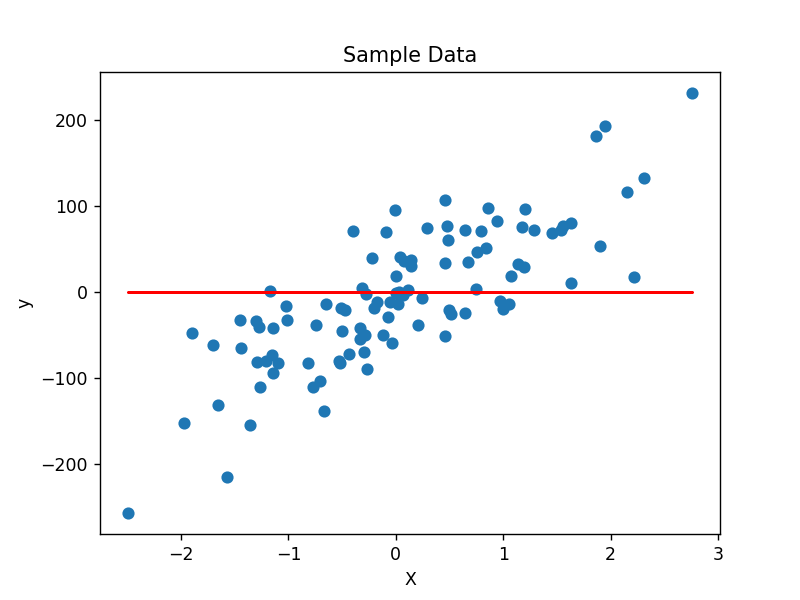

In [77]:
fig = plt.figure()
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X,y)

plt.savefig('data.png')
plt.show()

In [90]:
ms, bs = linear_regression(X.ravel(), y, epochs=200, learning_rate=0.01)

# build the lines, mx + b for all ms X's and b's + Transpose for easy indexing
y_lines = (ms * X + bs).T

In [79]:
# the starting point of the regression to the previous plot
plt.plot(X, y_lines[0], c='r')

<IPython.core.display.Javascript object>


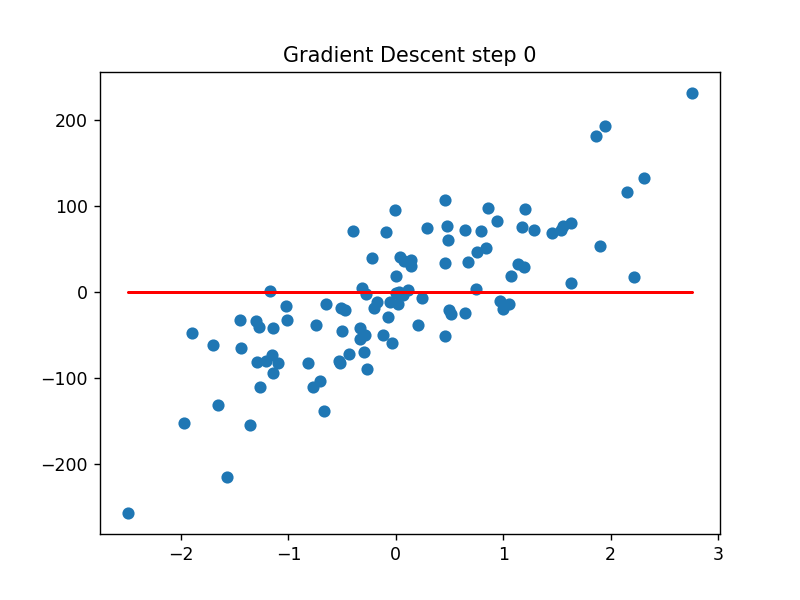

In [117]:
# create the animation

fig = plt.figure()

# plot our original data
plt.scatter(X,y)

# create a line to update
line, = plt.plot(X, y_lines[0], c='r')
#plt.title('Gradient Descent Animation Example')


from matplotlib.animation import FuncAnimation

# update the frames based on the parameter i
def animate(i):
    
    # set the title to indicate the iteration
    plt.title(f'Gradient Descent step {i}')
    
    # change the data for the y axis points of the line
    line.set_ydata(y_lines[i])

    return line,

# run the animation
animation = FuncAnimation(fig=fig, func=animate, frames=len(ms), interval=20)

In [82]:
# Set up formatting for the movie files
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=12.5)

# save an mp4 of the animation
animation.save('matplotlib1.mp4', writer=writer)
animation

# Plotly


In [118]:
import plotly.graph_objects as go

# create the scatter plot
points = go.Scatter(x=X[:,0], y=y, mode='markers')

# create initial line
line = go.Scatter(x=X.flatten(), y=y_lines[0])

# create a layout with out title
#layout = go.Layout(title_text="Gradient Descent Animation")

# combine the graph_objects into a figure
fig = go.Figure(data=[points, line])
                                 
# to see what we have so far
fig.show()

In [122]:
# create a list of frames
frames = []

# create a frame for every line y
for i in range(len(y_lines)):
    
    # update the line
    line = go.Scatter(x=X.flatten(), y=y_lines[i])
    
    # add a button and
    # update the title to show the gradient descent step
    layout=go.Layout(updatemenus=[{'type':"buttons",
                                    'buttons':[{'label':"Play",
                                                'method':"animate",
                                                'args':[None, 
                                                        {"frame": {"duration": 20}
                                                        }]
                                               }]
                                  }],
                     title_text=f"Gradient Descent Step {i}")
    
    # create a frame object
    frame = go.Frame(data=[points, line],
                           layout=go.Layout(title_text=f"Gradient Descent Step {i}"))
                           
    # add the frame object to the frames list
    frames.append(frame)
                        
# combine the graph_objects into a figure
fig = go.Figure(data=[points, line],
                frames=frames,
                layout = layout)
                                 
# show our animation!
fig.show()

In [124]:
fig.write_html("plotly.html", auto_play=False)

In [112]:
#import plotly.express as px
import plotly.graph_objects as go

points = go.Scatter(x=X[:,0], y=y, mode='markers')

line = go.Scatter(x=X.flatten(), y=y_lines[0])
#                  layout=go.Layout(title_text=f"Gradient Descent Step 0"))

start_frames = [go.Frame(data=[
                 points,
                 go.Scatter(x=X.flatten(), y=y_lines[:,0])],
                 layout=go.Layout(title_text=f"Gradient Descent Step 0")
                ) for i in range(20)]

frames=[go.Frame(data=[
                 points,
                 go.Scatter(x=X.flatten(), y=y_lines[:,i])],
                 layout=go.Layout(title_text=f"Gradient Descent Step {i}")
                ) for i in range(len(ms))]

frames = start_frames + frames
                
fig = go.Figure(#data=[points, line], 
                layout=go.Layout(updatemenus=[dict(type="buttons",
                                                   buttons=[dict(label="Play",
                                                                 method="animate",
                                                                 args=[None, {"frame": {"duration": 20}}])])],
                                  title_text="Gradient Descent Animation",
                ),
               frames = frames)
                
        

fig.show()

#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()

#iplot(fig)

IndexError: index 100 is out of bounds for axis 1 with size 100

In [29]:
y_lines = ms * X + bs
y_lines[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
ms[0] * X.flatten() + bs[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])